QUANTIUM VIRTUAL INTERNSHIP

In [2]:
#importing datasets and defining into a Dataframe

In [3]:
import numpy as np
import pandas as pd
df_t= pd.read_excel('C:/Users/ACER/Downloads/QVI_transaction_data.xlsx')
print(df_t)
df_p=pd.read_csv('C:/Users/ACER/Downloads/QVI_purchase_behaviour.csv')
print(df_p)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

In [4]:
#Extracting useful information and datatypes of the DataFrame

In [5]:
df_t.info()
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
m

In [6]:
df_t['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [7]:
#removing the special characters and digits from the prod_name column

In [8]:
df_t['PROD_NAME']= df_t['PROD_NAME'].str.replace(r'[^a-zA-Z0-9\s]','',regex = True)

In [9]:
df_t['PROD_NAME']=df_t['PROD_NAME'].str.strip()

In [10]:
df_t['PROD_NAME']

0          Natural Chip        Compny SeaSalt175g
1                        CCs Nacho Cheese    175g
2          Smiths Crinkle Cut  Chips Chicken 170g
3            Smiths Chip Thinly  SCreamOnion 175g
4         Kettle Tortilla ChpsHnyJlpno Chili 150g
                           ...                   
264831    Kettle Sweet Chilli And Sour Cream 175g
264832              Tostitos Splash Of  Lime 175g
264833                   Doritos Mexicana    170g
264834    Doritos Corn Chip Mexican Jalapeno 150g
264835              Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [11]:
#Changing the 'DATE' datatype 

In [12]:
reference_date=pd.to_datetime('1899-12-30')
time_delta=pd.to_timedelta(df_t['DATE'],unit='D')
df_t['DATE']=reference_date+time_delta
df_t['DATE']=pd.to_numeric(df_t['DATE'])


df_t['DATE']=pd.to_datetime(df_t['DATE'])

In [13]:
df_t['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [14]:
#Finding major products in the Datframe

In [15]:
unique_products= df_t['PROD_NAME'].unique()
print(unique_products)
words=[]
for name in unique_products:
    for word in name.split():
        words.append(word)
product_word=pd.DataFrame(words,columns=['words'])
product_word['words'] = product_word['words'].str.replace(r'[^a-zA-Z\s]','',regex = True)
product_word.head()


['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  SCreamOnion 175g'
 'Kettle Tortilla ChpsHnyJlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt  Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    CreamChives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream     Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  ChilliLime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles SweetSpcy BBQ 134g' 'Red Rock Deli SR  

,words
0,Natural
1,Chip
2,Compny
3,SeaSaltg
4,CCs


In [16]:
# Let's look at the most common words by counting the number of times a word appears

In [17]:
product_word['words'].value_counts().head(20).sort_values(ascending=False)

words
g           105
Chips        21
Smiths       16
Cut          14
Crinkle      14
Kettle       13
Salt         12
Cheese       12
Original     10
Chip          9
Doritos       9
Salsa         9
Corn          8
Pringles      8
RRD           8
Chicken       7
WW            7
Sour          6
Chilli        6
Sea           6
Name: count, dtype: int64

In [18]:
#this analysis shows that major products are of chips, which is 21 and least number of products are with chilli

In [19]:
#Examining the 'PRODUCT_NAME'

In [20]:
df_t['PROD_NAME']

0          Natural Chip        Compny SeaSalt175g
1                        CCs Nacho Cheese    175g
2          Smiths Crinkle Cut  Chips Chicken 170g
3            Smiths Chip Thinly  SCreamOnion 175g
4         Kettle Tortilla ChpsHnyJlpno Chili 150g
                           ...                   
264831    Kettle Sweet Chilli And Sour Cream 175g
264832              Tostitos Splash Of  Lime 175g
264833                   Doritos Mexicana    170g
264834    Doritos Corn Chip Mexican Jalapeno 150g
264835              Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [21]:
#Changing the datatype of Product_name to string from object as to perform further analysis and removing the products containg 'Salsa' as we are only
#in 'Chips'

In [22]:
import re
df_t['PROD_NAME']=df_t['PROD_NAME'].astype(str)
df_t = df_t[~ df_t['PROD_NAME'].str.contains(r'\bSalsa\b', case = False,na=True)]


In [23]:
df_t['PROD_NAME']

0          Natural Chip        Compny SeaSalt175g
1                        CCs Nacho Cheese    175g
2          Smiths Crinkle Cut  Chips Chicken 170g
3            Smiths Chip Thinly  SCreamOnion 175g
4         Kettle Tortilla ChpsHnyJlpno Chili 150g
                           ...                   
264831    Kettle Sweet Chilli And Sour Cream 175g
264832              Tostitos Splash Of  Lime 175g
264833                   Doritos Mexicana    170g
264834    Doritos Corn Chip Mexican Jalapeno 150g
264835              Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 246742, dtype: object

In [24]:
#Extracting all the statistical terms such as mean,minimum,maximum

In [25]:
df_t.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [26]:
df_t['PROD_QTY']

0         2
1         3
2         2
3         5
4         3
         ..
264831    2
264832    1
264833    2
264834    2
264835    2
Name: PROD_QTY, Length: 246742, dtype: int64

In [27]:
#Finding the outlier in the 'Product_Quantity' as to ensure real transactions for analysis

In [28]:
outlier=[]
data = df_t
def detect_outlier(data) :
    threshold=0.65 #std=0.65 
    mean=np.mean(data)
    std=np.std(data)
    for i in data :
       z_score=(i - mean)/std
       if np.abs(z_score)>threshold: 
        outlier.append(i)
    return outlier
prod_qty_outlier= detect_outlier(df_t['PROD_QTY'])
print(prod_qty_outlier)


[3, 5, 3, 1, 1, 1, 1, 5, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 1, 3, 1, 3, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 4, 1, 4, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [29]:
#Now we define the Inter Quartile Range and find the lower fence and upper fence for determining the outlier

0.0
1.0 1.0


<Axes: >

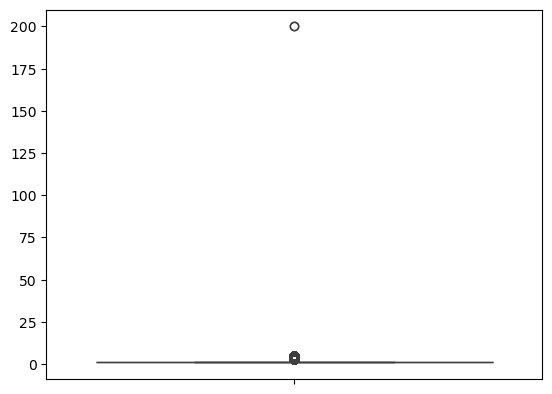

In [30]:
sorted_pq_outlier=sorted(prod_qty_outlier)
sorted_pq_outlier
q1,q3=np.percentile(sorted_pq_outlier,[25,75])
IQR= q3-q1
print(IQR)
lower_fence= q1-(1.5*IQR)
higher_fence=q3+(1.5*IQR)
print(lower_fence,higher_fence)
import seaborn as sns
sns.boxplot(sorted_pq_outlier)


In [31]:
#Checking which customer had transaction of 200

In [32]:
df_outlier=df_t[df_t['PROD_QTY']==200]
print(df_outlier)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [33]:
#there are two transaction where the product quantity is 200, now we check if the customer had any other transaction

In [34]:
df_customer_txn1=df_t[df_t['TXN_ID']==226201]
df_customer_txn2=df_t[df_t['TXN_ID']==226210]
print(df_customer_txn1)
print(df_customer_txn2)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [35]:
#there are no other transaction of the respective customer so we will remove the customer's loyality card subscription

In [36]:
outlier_id1=226201
outlier_id2=226210
df_t.loc[(df_t['TXN_ID']==outlier_id1)|(df_t['TXN_ID']==outlier_id2),'LYLTY_CARD_NBR']=np.nan

In [37]:
#Examining the two customers

In [38]:
df_loyality_check= df_t[df_t['TXN_ID']==226201]
df_loyality_check2= df_t[df_t['TXN_ID']==226210]
print(df_loyality_check)
print(df_loyality_check2)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226             NaN  226201         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69763 2019-05-20        226             NaN  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [39]:
#removing the outliers for further analysis

In [40]:
df_t_no_outlier=df_t[df_t['PROD_QTY']!=200]
print(df_t_no_outlier)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1          1000.0       1         5   
1      2019-05-14          1          1307.0     348        66   
2      2019-05-20          1          1343.0     383        61   
3      2018-08-17          2          2373.0     974        69   
4      2018-08-18          2          2426.0    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272        272319.0  270088        89   
264832 2018-08-13        272        272358.0  270154        74   
264833 2018-11-06        272        272379.0  270187        51   
264834 2018-12-27        272        272379.0  270188        42   
264835 2018-09-22        272        272380.0  270189        74   

                                      PROD_NAME  PROD_QTY  TOT_SALES  
0        Natural Chip        Compny SeaSalt175g         2        6.0  
1                      CCs Nacho Cheese    175g         3        

In [41]:
#Sorting and calculating the number of transactions according to date while also determing the missing dates

In [42]:
print(df_t_no_outlier['DATE'])
transaction_by_date = df_t_no_outlier.groupby('DATE').size()
print(transaction_by_date)
date_range= pd.date_range(start=transaction_by_date.index.min(),end=transaction_by_date.index.max(),freq='D')
daily_transactions=transaction_by_date.reindex(date_range,fill_value=0)
print("MISSING DATES:")
print(daily_transactions[daily_transactions==0])

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 246740, dtype: datetime64[ns]
DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64
MISSING DATES:
2018-12-25    0
Freq: D, dtype: int64


In [43]:
#Plotting the date wise transaction so that we can know in which month the sale was maximum or minimum

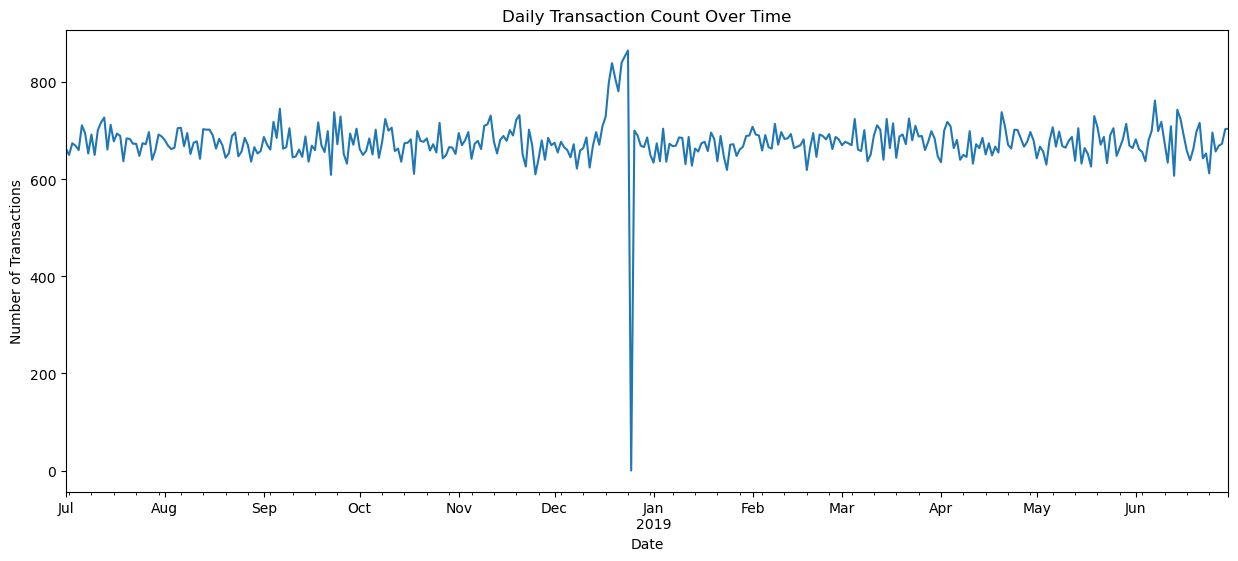

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
daily_transactions.plot(kind='line')
plt.title('Daily Transaction Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

In [45]:
#the above graph shows a sudden increase in sales in the month of December because of Christmas festival and after 
#that we can see a fall in the graph 

In [46]:
#Now we need to know more about the December month sales,so we go deeper and plot the graph accordingly

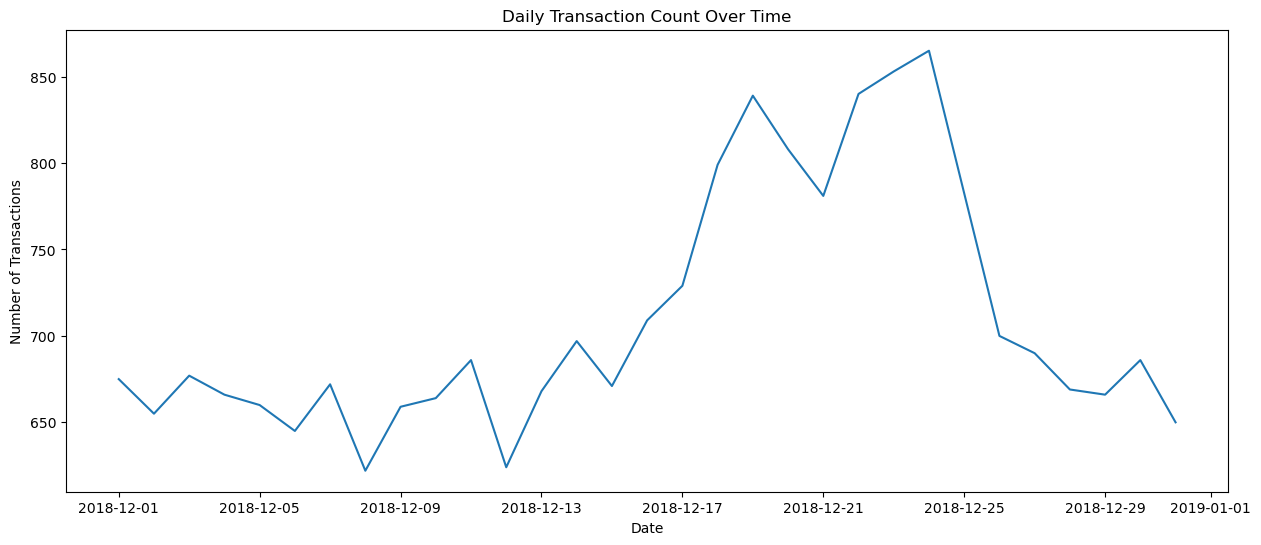

In [47]:
december_transaction = df_t_no_outlier[df_t_no_outlier['DATE'].dt.month==12]
daily_dec_trans= december_transaction.groupby(december_transaction['DATE'].dt.date).size().reset_index(name='transaction_count')
import seaborn as sns
plt.figure(figsize=(15,6))
sns.lineplot(data=daily_dec_trans,x='DATE',y='transaction_count')
plt.title('Daily Transaction Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

In [48]:
#In the graph ,a sudden rise was during mid December showing increase in sales because of the festival Christmas

In [49]:
#Creating Packsize

In [50]:
df_t_no_outlier['Pack_size1']= df_t_no_outlier['PROD_NAME'].str.extract(r'(\d+[g])')
df_t_no_outlier['Pack_size1']

C:\Users\ACER\AppData\Local\Temp\ipykernel_10620\2750994677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_no_outlier['Pack_size1']= df_t_no_outlier['PROD_NAME'].str.extract(r'(\d+[g])')


0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: Pack_size1, Length: 246740, dtype: object

In [51]:
#Evaluation of the Sales by Packsize

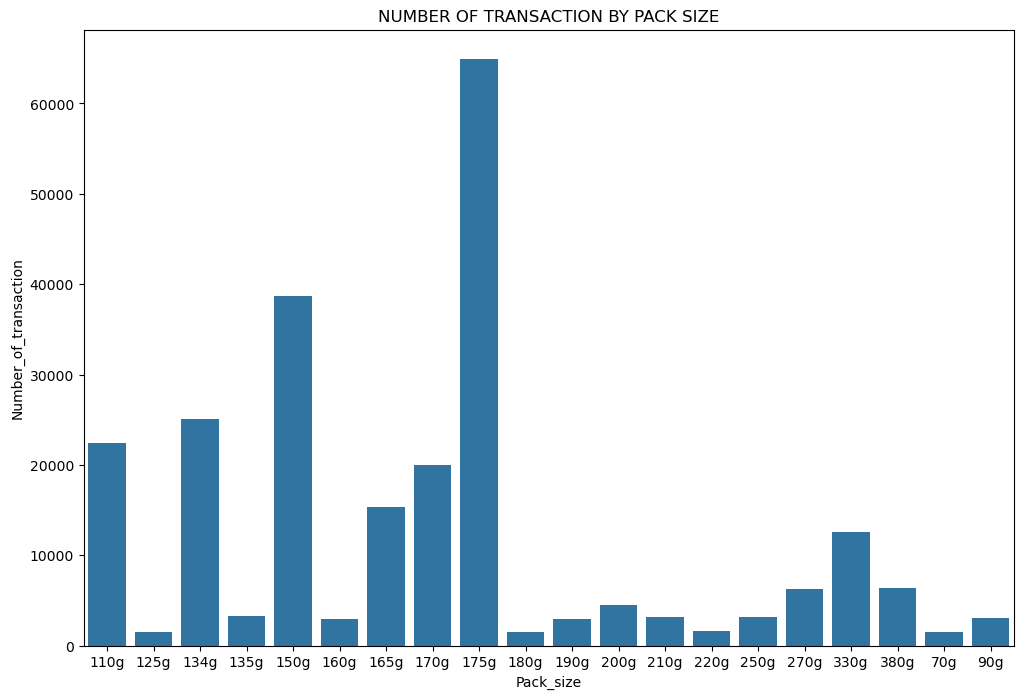

In [52]:
pack_size_counts=df_t_no_outlier['Pack_size1'].value_counts().sort_index()
pack_size_counts
plt.figure(figsize=(12,8))
sns.barplot(x=pack_size_counts.index,y=pack_size_counts.values)
plt.title('NUMBER OF TRANSACTION BY PACK SIZE')
plt.xlabel('Pack_size')
plt.ylabel('Number_of_transaction')
plt.show()

In [53]:
#by the graph, we can say that people prefer to buy the packsize of 175g the most and packsize of 125g,180g,220g, and 70g are
#the least preferred packsize by the customers

In [54]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [55]:
#merging the Transaction DataFrame with the Customer Behaviour DataFrame

In [56]:
merged_df= pd.merge(df_t_no_outlier,df_p,on='LYLTY_CARD_NBR',how='left')
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size1,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000.0,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307.0,348,66,CCs Nacho Cheese 175g,3,6.3,175g,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343.0,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373.0,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,175g,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426.0,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150g,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319.0,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358.0,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379.0,270187,51,Doritos Mexicana 170g,2,8.8,170g,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379.0,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,YOUNG SINGLES/COUPLES,Premium


In [57]:
merged_df.to_csv('merged_qvi_dataset.csv',index=False)

In [58]:
#Evaluating and plotting the total sales by Lifestage and Premium Customers

<Figure size 1000x600 with 0 Axes>

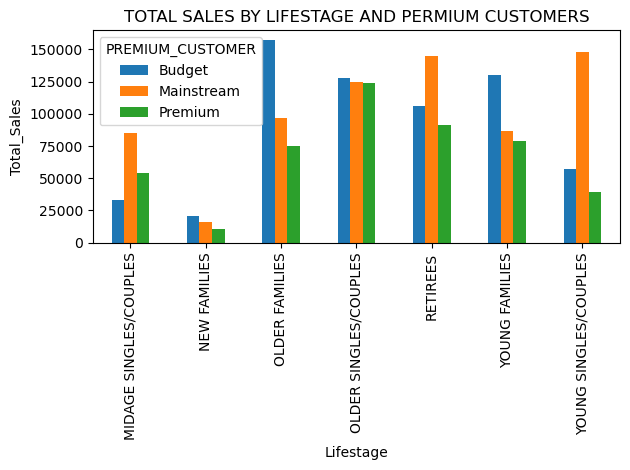

In [59]:
sales_by_lifestage_premium= merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()
plt.figure(figsize=(10,6))
sales_by_lifestage_premium.plot(kind='bar')
plt.title('TOTAL SALES BY LIFESTAGE AND PERMIUM CUSTOMERS')
plt.xlabel('Lifestage')
plt.ylabel('Total_Sales')
plt.tight_layout()
plt.show()

In [60]:
#The above Graph shows that Older Families are the maximum in budget sector while new families are the least in budget sector 
#Young Singles/Couples and Retires are the most in Mainstream sector while New Families are the least
#Older Singles/Couple are the most in the Premium sector while New Families are the least

<Figure size 1000x600 with 0 Axes>

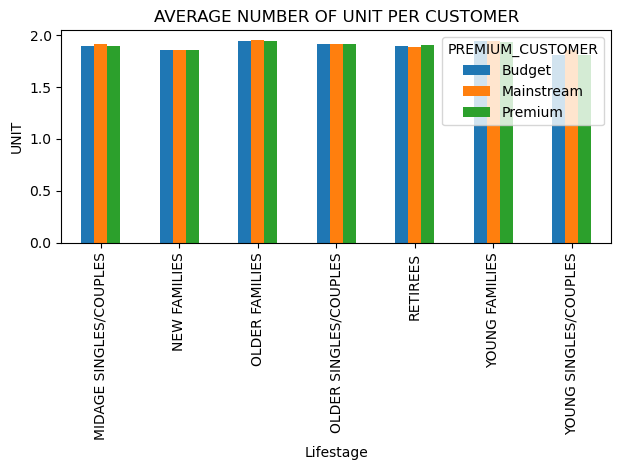

In [61]:
avg_unit_by_lifestage_premium= merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].mean().unstack()
plt.figure(figsize=(10,6))
avg_unit_by_lifestage_premium.plot(kind='bar')
plt.title('AVERAGE NUMBER OF UNIT PER CUSTOMER')
plt.xlabel('Lifestage')
plt.ylabel('UNIT')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

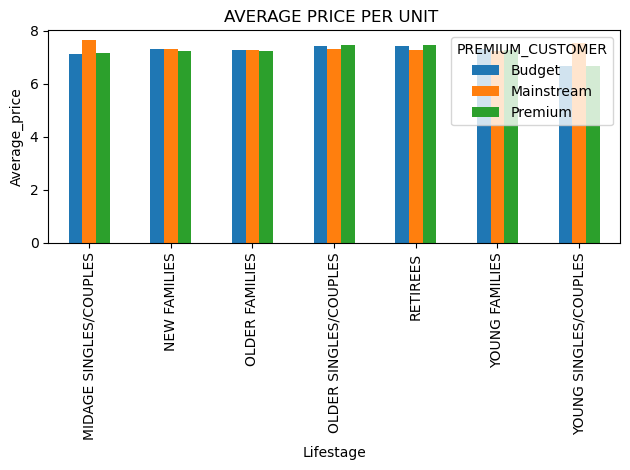

In [62]:
avg_price_by_lifestage_premium= merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].mean().unstack()
plt.figure(figsize=(10,6))
avg_price_by_lifestage_premium.plot(kind='bar')
plt.title('AVERAGE PRICE PER UNIT ')
plt.xlabel('Lifestage')
plt.ylabel('Average_price')
plt.tight_layout()
plt.show()

In [63]:
from scipy import stats
#PRICE PER UNIT FOR EACH TRANSACTION
merged_df['price_per_unit']=merged_df['TOT_SALES']/merged_df['PROD_QTY']
#Comparison between Unit price of Mainstream Midage and Young Singles/Couples vs Budget or premium Midage and Young singles/couples
mainstream_price=merged_df[(merged_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']))&
                                                        (merged_df['PREMIUM_CUSTOMER']=='Mainstream')]['price_per_unit'].dropna()
budget_premium_price=merged_df[(merged_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES']))&
(merged_df['PREMIUM_CUSTOMER'].isin(['Budget','Premium']))]['price_per_unit'].dropna()
t_stat_1,p_value_1=stats.ttest_ind(mainstream_price,budget_premium_price,equal_var=False)
print(f'T-statistics:{t_stat_1}')
print(f'P-value:{p_value_1}')

T-statistics:37.6243885962295
P-value:6.967354233018139e-306


In [64]:
#The T-statistics indicates a significant difference between the two segments
#The t-test results in a p-value of 6.967354233018139e-306, i.e. the unit price for mainstream,young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples

In [65]:
#INSIGHTS
#1.Significant Price Difference - There is a statiscally significant difference in the average price per unit paid by the two customer segment
#2.Younger Group pays more - the young singles/couples segment pays a higher average price per unit compared to Midage segment(- T-statistics)


In [71]:
import pandas as pd
from scipy.stats import ttest_ind
#calculate price per unit
merged_df['Price_per_unit'] = merged_df['TOT_SALES']/merged_df['PROD_QTY']
#Filter for relevant lifestages
filterd_data= merged_df[merged_df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES'])]
#plit into two groups mainstream vs others
mainstream=filterd_data[filterd_data['PREMIUM_CUSTOMER']=='Mainstream']['price_per_unit']
non_mainstream=filterd_data[filterd_data['PREMIUM_CUSTOMER']!='Mainstream']['price_per_unit']
#perform welch t-test 
t_stat1,p_value1=ttest_ind(mainstream,non_mainstream,equal_var=False,alternative='greater')
#display results
print("Welch two sample t-test")
print(f"t-statistics:{t_stat1:.4f}")
print(f"pvalue:{p_value1:.4e}")
if p_value1<0.05:
    print("The difference in mean unit price is statistically significant.")
else:
    print("The difference in mean unit is not statistically significant.")

Welch two sample t-test
t-statistics:37.6244
pvalue:3.4837e-306
The difference in mean unit price is statistically significant.


In [77]:
df=merged_df.copy()
df['Price']=df['TOT_SALES']/df['PROD_QTY']
df=df.replace([np.inf,-np.inf],np.nan)
df=df.dropna(subset=['Price','LIFESTAGE','PREMIUM_CUSTOMER'])
df= df[df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES'])]
main = df[df['PREMIUM_CUSTOMER']=='Mainstream']['Price']
others = df[df['PREMIUM_CUSTOMER']!= 'Mainstream']['Price']
from scipy.stats import ttest_ind
t,p = ttest_ind(main,others,equal_var=False, alternative='greater')
print(t,p)

37.6243885962295 3.4836771165090696e-306
